In [1]:
import cv2
from matplotlib import pyplot as plt

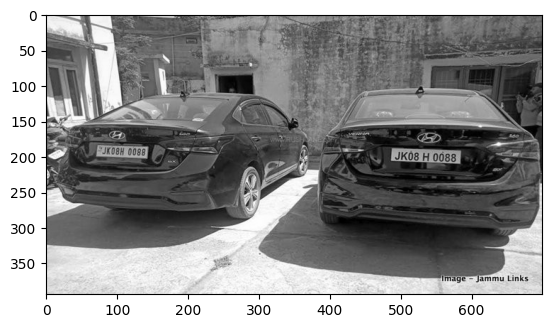

In [2]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

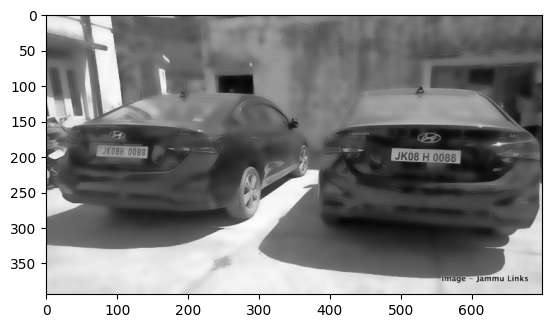

In [3]:
gaus = cv2.bilateralFilter(gray, 15, 50, 50)
plt.imshow(cv2.cvtColor(gaus, cv2.COLOR_BGR2RGB))

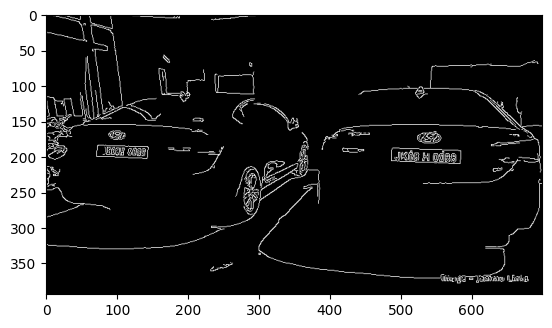

In [4]:
canny_gaus = cv2.Canny(gaus, 50, 250)
plt.imshow(cv2.cvtColor(canny_gaus, cv2.COLOR_BGR2RGB))

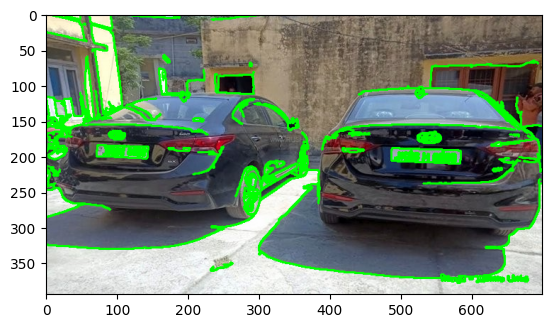

In [5]:
img_copy = img.copy()
cnt_canny_gaus, _ = cv2.findContours(canny_gaus.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy, cnt_canny_gaus, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

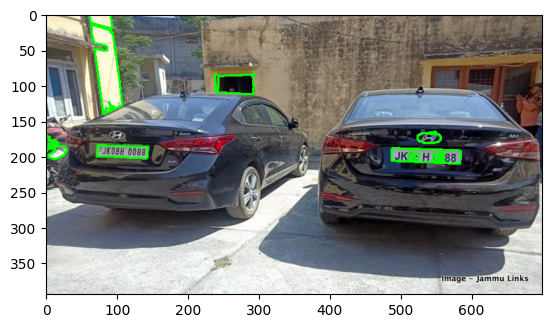

In [6]:
img_copy = img.copy()
cnt_canny_gaus = sorted(cnt_canny_gaus, key=cv2.contourArea, reverse=True)[:10]
cv2.drawContours(img_copy, cnt_canny_gaus, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

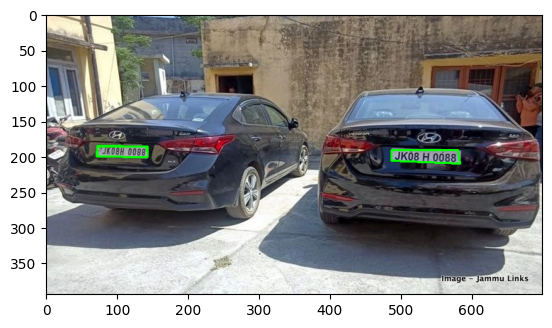

In [7]:
img_copy = img.copy()
target = None

for c in cnt_canny_gaus:
    contour_perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * contour_perimeter, True)
    if len(approx) == 4:
        cv2.drawContours(img_copy, [approx], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))